<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Juan Pablo Rivera | Andrés Green.

**Fecha:** 6 de octubre del 2020.

**Expediente** : 714314 | 713504. 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link GitHub:** https://github.com/andresgreen-byte/TareasConjunto_AndresG_JuanPablo_R

# Tarea 4a

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

In [99]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

NameError: name 'Pi' is not defined

In [93]:
# Respuesta Andrés Green

C:\Users\Juan Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


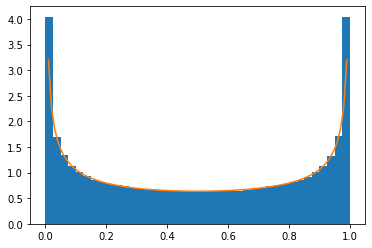

In [127]:
# Respuesta Juan Pablo Rivera
def com_den(fx, finv, N):
    u = np.random.uniform(0,1,N)
    f_random = finv(u)
    x = np.arange(0,1,.01)
    fx = fx(x)
    plt.hist(f_random,bins=40,density = True)
    plt.plot(x,fx)
    plt.show();

N = 10**6 
fx =lambda x:1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
finv =lambda y: np.sin(y*np.pi/2)**2
com_den(fx,finv,N)



 #### Derivada
 $$\frac{1}{x \sqrt {-(x-1)x}}$$

#### Funcion Inversa
$$x=\sin^{2}(\frac{\mu\pi}{2})$$


> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

In [95]:
# Respuesta Andrés Green

In [96]:
# Respuesta Juan Pablo Rivera
#Genero la funcion para la distribución discreta
def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_ac: 'Prob.Acumulada de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in prob_ac if i<X[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    

In [97]:
def P_acum_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

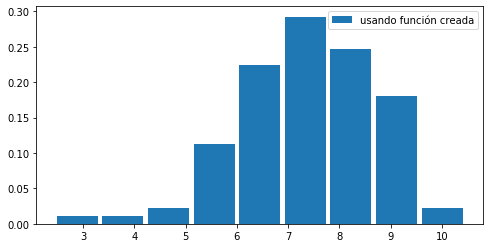

In [98]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 100

p_acum = P_acum_binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')


In [6]:
# Respuesta Andrés Green

In [7]:
# Respuesta Juan Pablo Rivera

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


In [8]:
# Respuesta Andrés Green

[1.875] [1.875]


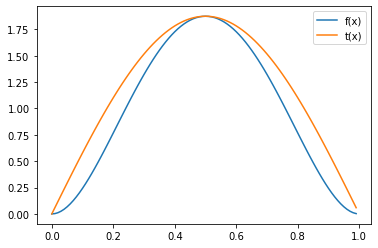

In [102]:
# Respuesta Juan Pablo Rivera
f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.sin(x*np.pi) 
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01) 
print(max_f,max_t)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

In [10]:
# Respuesta Andrés Green

Respuesta Juan Pablo Rivera
$$a=0$$

$$b=1$$

$$g(x)=\frac{f(x)}{c}$$

$$c = \int_{-\infty}^{\infty} t(x) dx$$.

$$ c=\int_{a}^{b} t(x)  dx$$

$$ c=\int_{0}^{1} t(x)  dx$$

$$c= \int_{0}^{1} a \sin(\pi x) dx$$

$$c= \frac{2a}{\pi} $$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$


3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

In [12]:
# Respuesta Andrés Green

 Respuesta Juan Pablo Rivera
 
 $$G(x) = \int g(x)dx $$
 
 $$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ u = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2u = (- \cos(\pi x)+1) $$

$$ 2u-1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2u+1) = \pi x$$

$$x= \frac{\cos^{-1}(-2u+1)}{\pi}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

In [14]:
# Respuesta Andrés Green

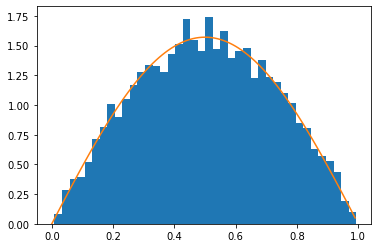

In [128]:
# Respuesta Juan Pablo Rivera
n=10000
g = lambda x: (np.pi / 2) * np.sin(np.pi * x)
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)
com_den(g,g_inv,n)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. 

In [16]:
# Respuesta Andrés Green


In [136]:
# Respuesta Juan Pablo Rivera
# Código de solución 
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    q = 0
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()

El máximo de f es: [1.875]


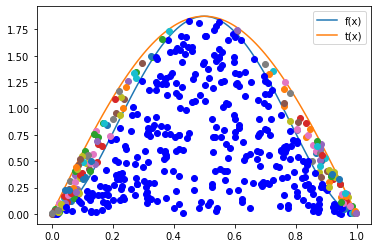

In [138]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

quantity_sin = Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [18]:
# Respuesta Andrés Green

In [153]:
# Respuesta Juan Pablo Rivera
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) 
t2= lambda x: max_f*np.ones(len(x))  
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', sum(Acep_rechazo2(R2,R1,f,t1))/N)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de ', sum(Acep_rechazo2(R2,R1,f,t2))/N)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 0.702
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de  0.538


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [20]:
# Respuesta Andrés Green


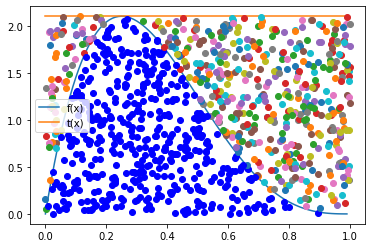

In [157]:
# Respuesta Juan Pablo Rivera
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)